In [1]:
# Load the dataset
library(datasets)
data(airquality)

In [2]:
# Examine the data structure
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [3]:
# View the first few rows
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


In [4]:
# Produce a basic statistical summary 
summary(airquality)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

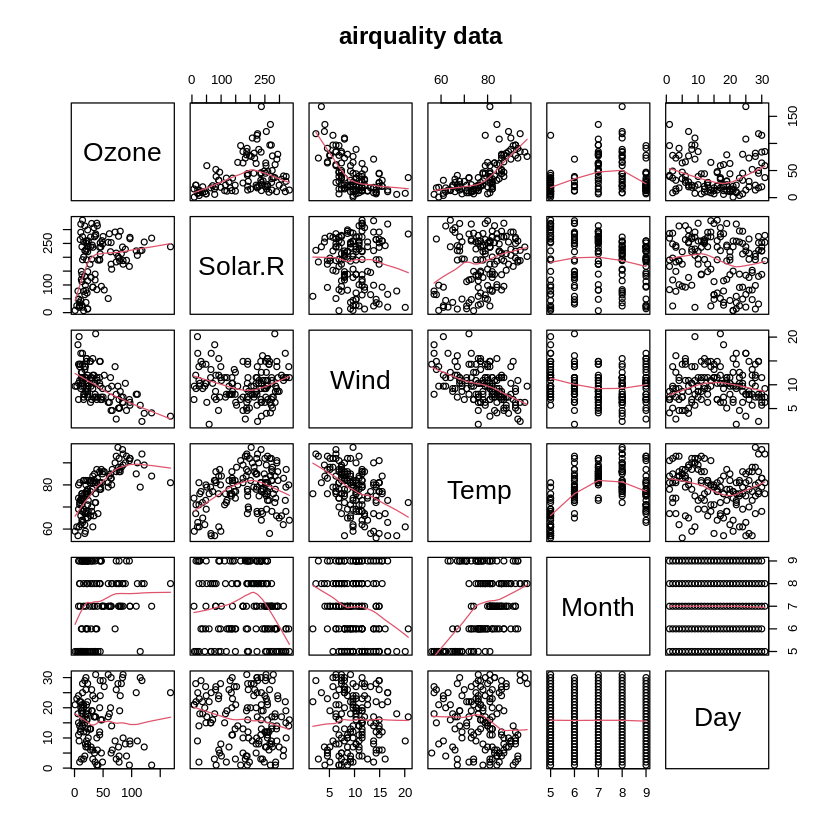

In [5]:
# Produce an exploratory matrix of scatterplots
library(graphics)
pairs(airquality, panel = panel.smooth, main = "airquality data")

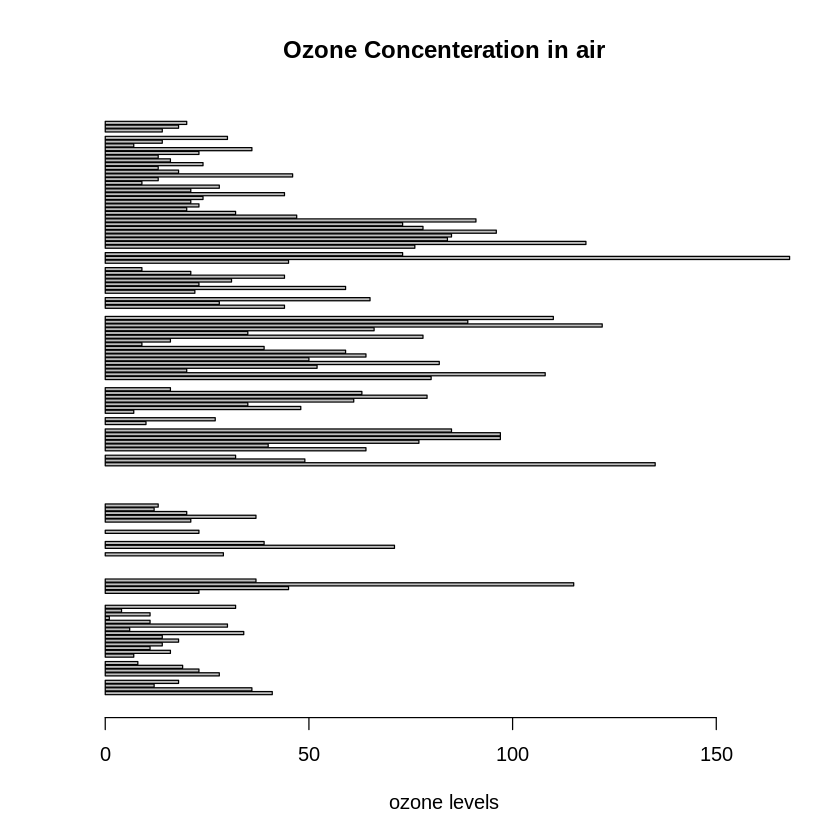

In [6]:
barplot(airquality$Ozone,
        main = 'Ozone Concenteration in air',
        xlab = 'ozone levels', horiz = TRUE)

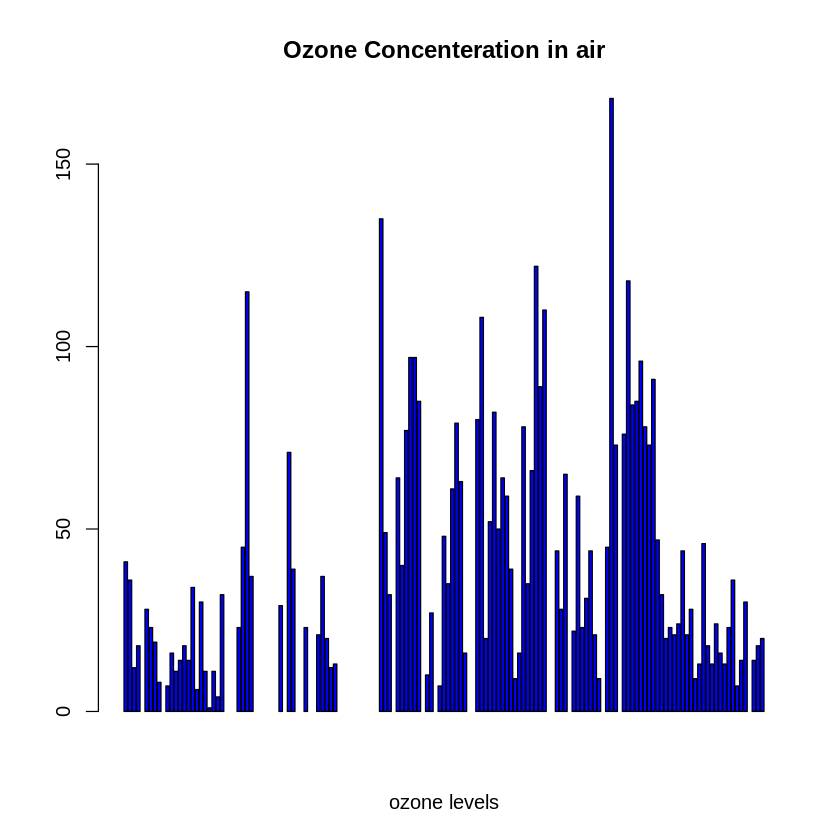

In [7]:
barplot(airquality$Ozone, main = 'Ozone Concenteration in air', 
        xlab = 'ozone levels', col ='blue', horiz = FALSE)

# Histogram

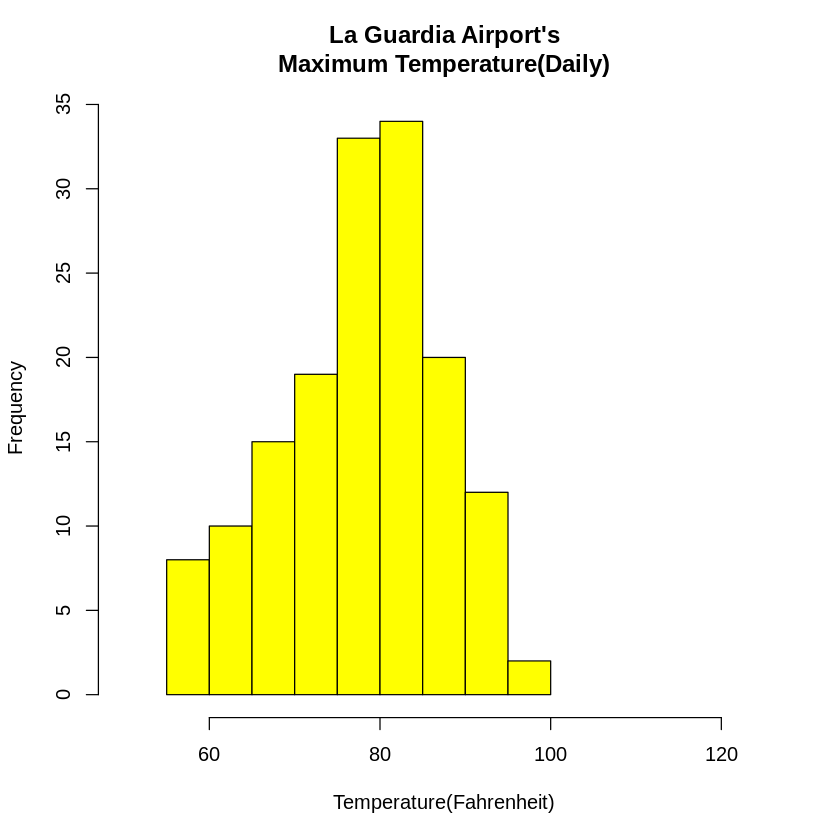

In [8]:
data(airquality)
  
hist(airquality$Temp, main ="La Guardia Airport's\
Maximum Temperature(Daily)",
    xlab ="Temperature(Fahrenheit)",
    xlim = c(50, 125), col ="yellow",
    freq = TRUE)

# Box Plot

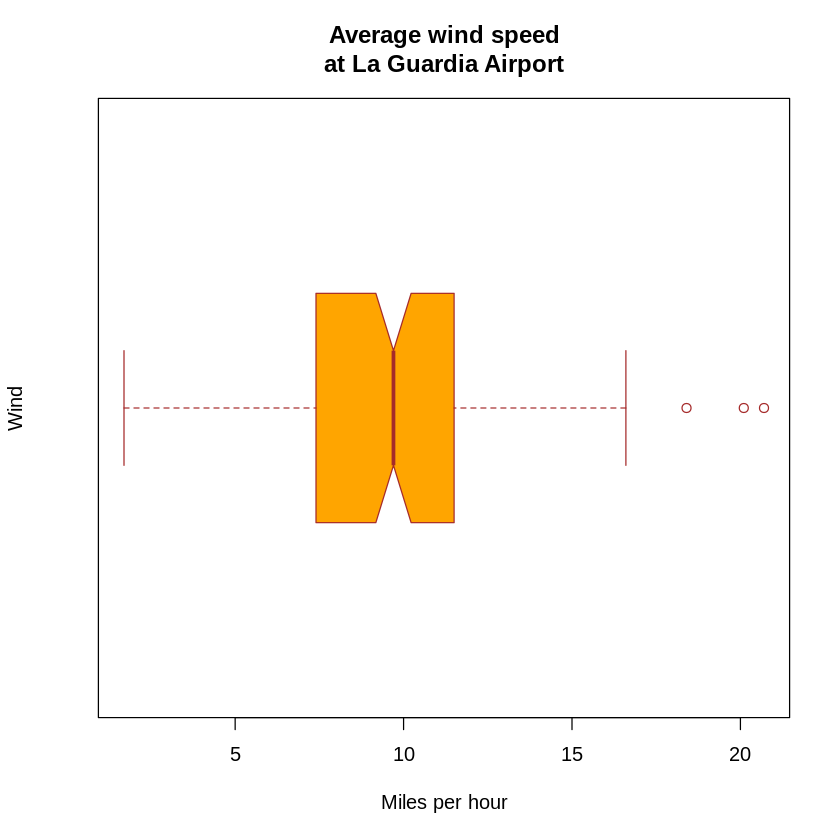

In [9]:
data(airquality)
  
boxplot(airquality$Wind, main = "Average wind speed\
at La Guardia Airport",
        xlab = "Miles per hour", ylab = "Wind",
        col = "orange", border = "brown",
        horizontal = TRUE, notch = TRUE)

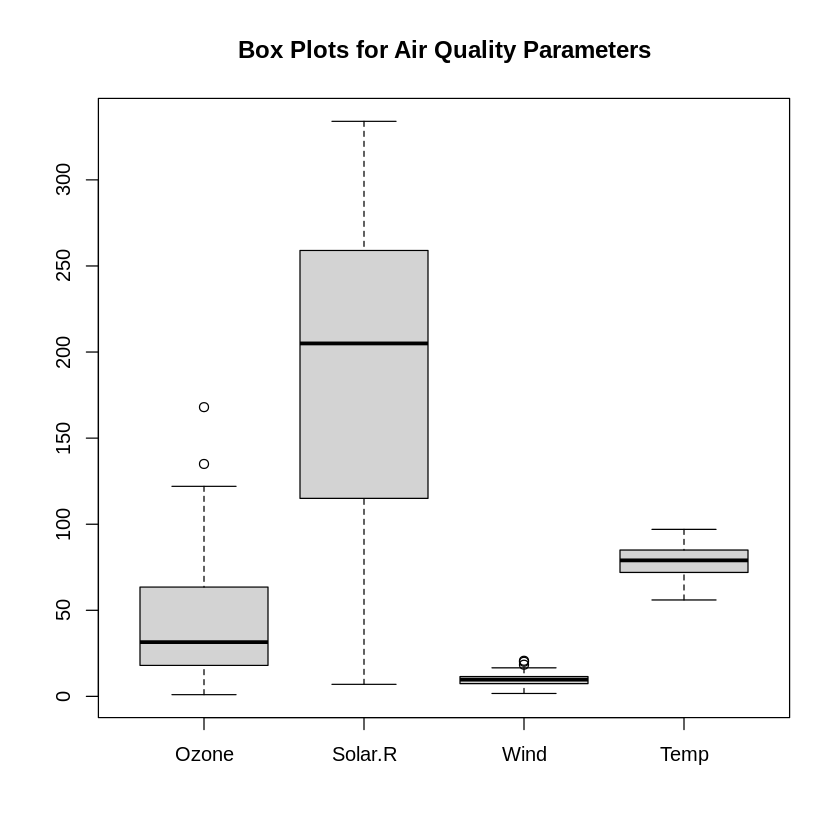

In [10]:
boxplot(airquality[, 0:4], 
        main ='Box Plots for Air Quality Parameters')

# Scatter Plot

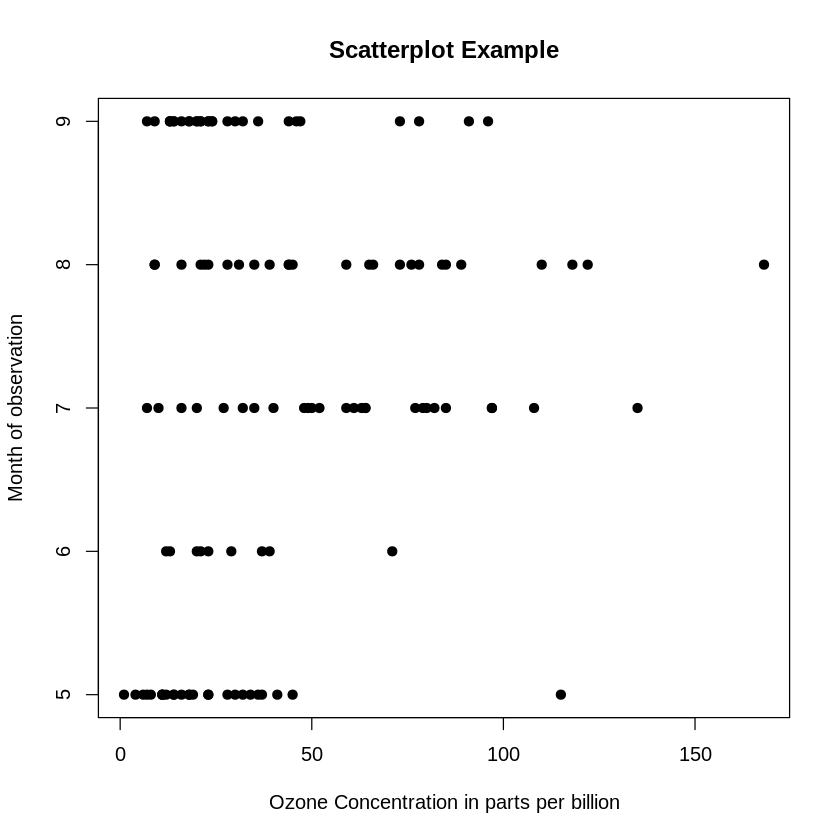

In [11]:
data(airquality)
  
plot(airquality$Ozone, airquality$Month,
     main ="Scatterplot Example",
    xlab ="Ozone Concentration in parts per billion",
    ylab =" Month of observation ", pch = 19)

# Heat Map

Warning message in matrix(rnorm(50, 0, 5), nrow = 5, ncol = 5):
“data length differs from size of matrix: [50 != 5 x 5]”


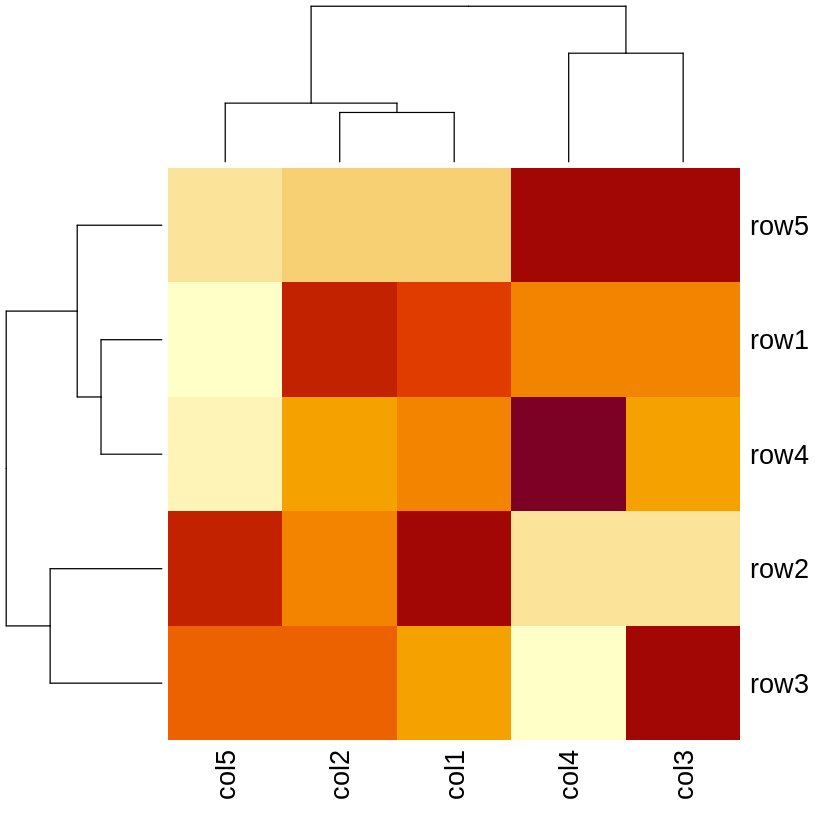

In [12]:
data <- matrix(rnorm(50, 0, 5), nrow = 5, ncol = 5)

colnames(data) <- paste0("col", 1:5)
rownames(data) <- paste0("row", 1:5)
  
heatmap(data) 

In [13]:
# Produce a summary of linear model fit statistics
library(stats)
fit <- lm(Ozone ~ Wind + Solar.R + Temp, data = airquality)
summary(fit)


Call:
lm(formula = Ozone ~ Wind + Solar.R + Temp, data = airquality)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.485 -14.219  -3.551  10.097  95.619 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -64.34208   23.05472  -2.791  0.00623 ** 
Wind         -3.33359    0.65441  -5.094 1.52e-06 ***
Solar.R       0.05982    0.02319   2.580  0.01124 *  
Temp          1.65209    0.25353   6.516 2.42e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.18 on 107 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.5948 
F-statistic: 54.83 on 3 and 107 DF,  p-value: < 2.2e-16


In [14]:
# Copy the dataset to a new data.frame, removing rows containing NA values
df <- na.omit(as.data.frame(airquality))

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”
Warning message in geom_point(method = "lm"):
“Ignoring unknown parameters: `method`”
`geom_smooth()` using formula = 'y ~ x'


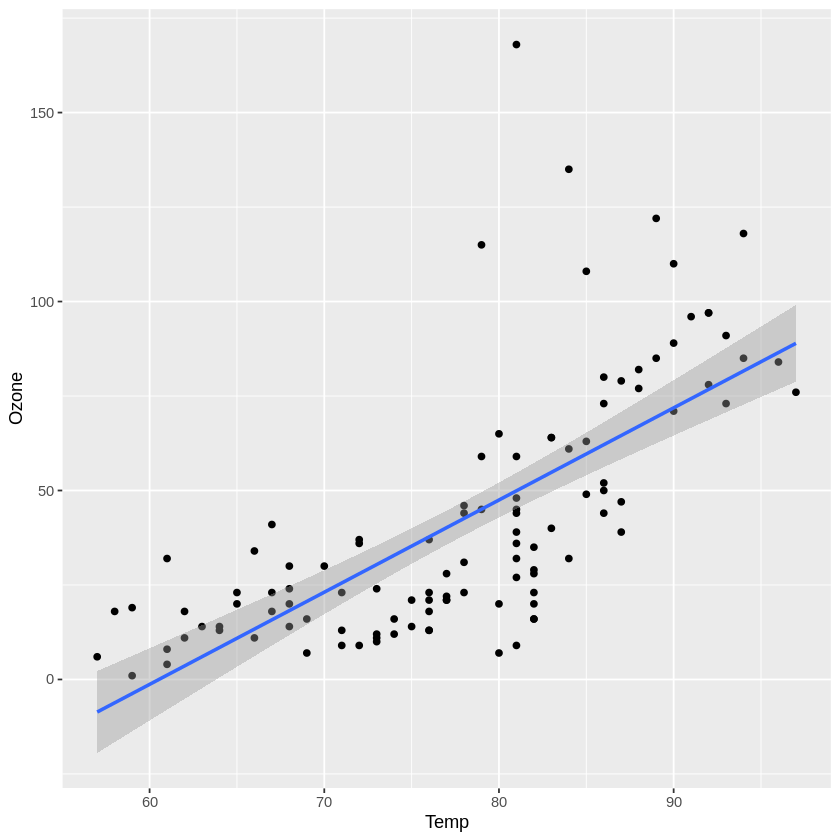

In [15]:
# Plot Ozone versus Temp with a linear regression fit
library("ggplot2")
qplot(Temp, Ozone, data=df, geom=c("point", "smooth"), method="lm")

In [16]:
# Create a new Date column from Month and Day, using "1973" as the year 
df$Date <- as.Date(paste("1973", df$Month, df$Day, sep="-"), "%Y-%m-%d")

In [17]:
# Select only Temp, Ozone, and Date
library(dplyr)
df <- select(df, Temp, Ozone, Date) 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [22]:
# Reshape into long format
install.packages('reshape2')
library('reshape2')
df <- melt(df, id="Date")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




`geom_smooth()` using formula = 'y ~ x'


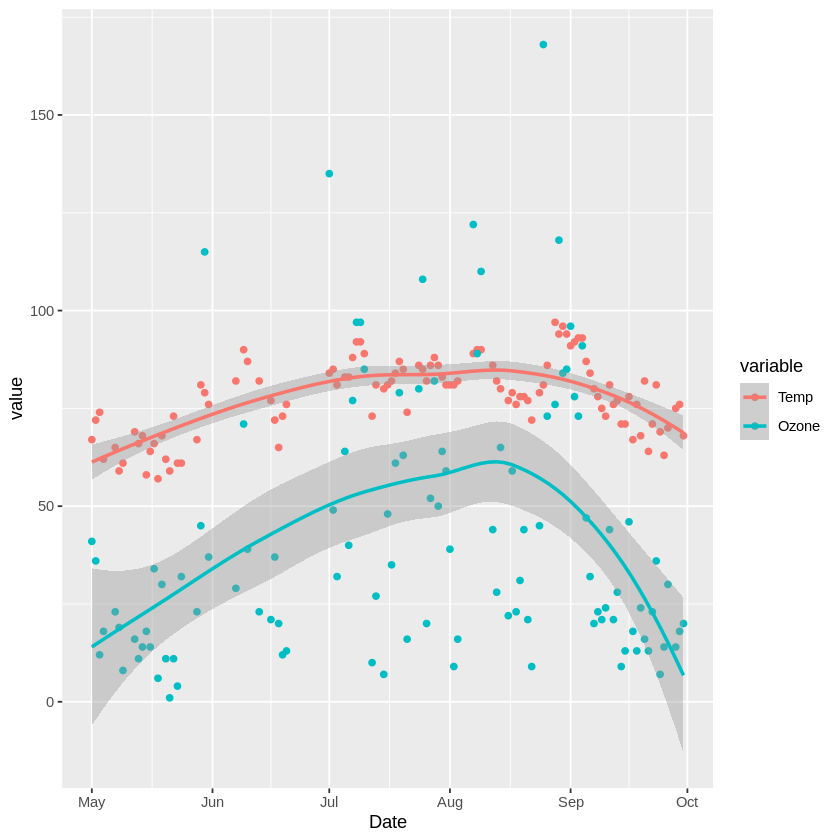

In [23]:
# Plot Temp and Ozone in time series with loess regression curves
ggplot(df, aes(x=Date, y=value, colour=variable, group=variable)) +
    geom_point(aes(y=value, colour=variable)) + geom_smooth(method="loess")